In [7]:
! pip install pyts
!pip install hcrystalball
!pip install catch22
!pip install --upgrade tsfresh
!pip install tbats
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Antonia Sanhueza

# HW7

## Part 1: Understangin the dataset

### 1.a 7pts Give a verbal description of the dataset from information on the acsf1 detailed webpage, not the summary repository page.

The dataset consists of appliances energy consumption. There are 10 categories of home appliances like phones and coffe machines. The data was originally created for a research paper. (Gisler, Christophe, et al. "Appliance consumption signature database and recognition test protocols." Systems, Signal Processing and their Applications (WoSSPA), 2013 8th International Workshop on. IEEE, 2013). The train size and test size is 100, and the time series length is 1,460.

### 1.b 7pts There are 1460 time steps in each observation. Use len() to display this for any observation in the X_train


In [13]:
from pyts import datasets
import pandas as pd
import numpy as np

data_dic = datasets.fetch_ucr_dataset('ACSF1')
df_train = data_dic['data_train']
df_train

array([[-0.58475375, -0.58475375,  1.730991  , ..., -0.5786034 ,
         1.7327257 , -0.58473404],
       [-0.59143435, -0.51110416,  1.7268197 , ..., -0.58073052,
         1.7273961 , -0.58073052],
       [-0.57794535, -0.57794535,  1.7307931 , ..., -0.5497977 ,
         1.7347268 , -0.57775109],
       ...,
       [-0.99827705,  0.10246194,  1.6069248 , ...,  0.09938861,
         1.5636906 , -0.69265292],
       [-0.94147312,  0.58721361,  1.5236441 , ...,  0.58223019,
         1.5482239 , -0.64529199],
       [-0.66153552, -0.66153552,  1.5103272 , ..., -0.66053949,
         1.5101048 , -0.66068454]])

In [11]:
df_train.shape
len(df_train[0])

1460

### 1.C 7pts Return the counts of classes in y_train

In [19]:
import numpy as np

y_train = data_dic['target_train']
print('Number of classes is', len(np.unique(y_train)))

Number of classes is 10


### 1.D 7pts Plot the first time series for each class(.iloc[0]), label each plot with its specified class name. The patterns should match what can be found on the acsf1 detailed webpage.

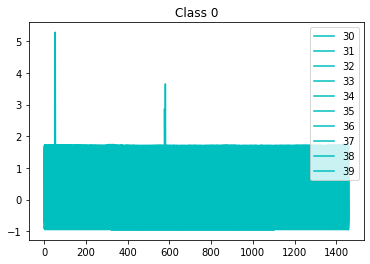

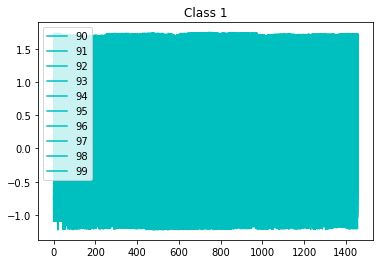

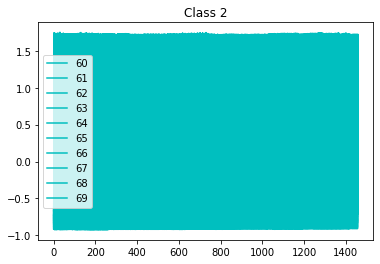

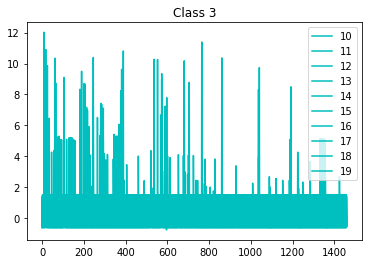

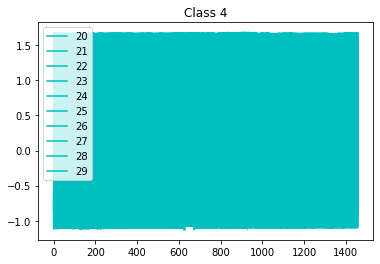

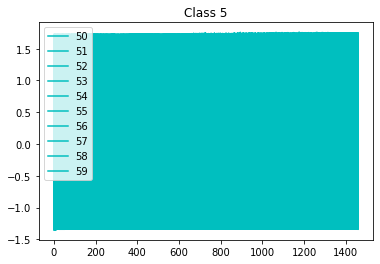

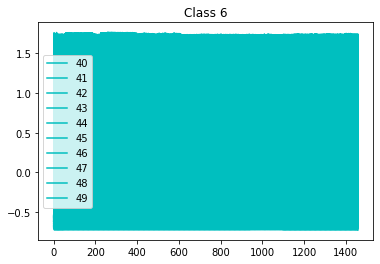

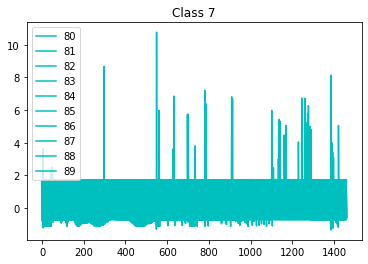

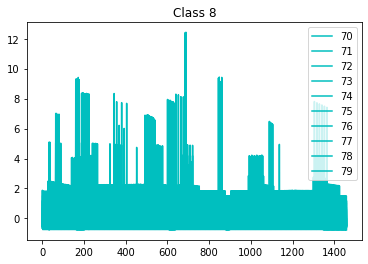

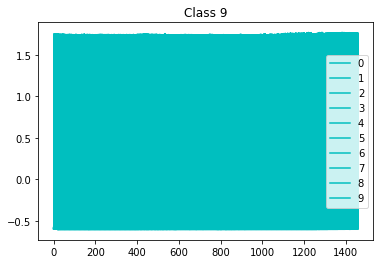

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

y_train = pd.DataFrame(y_train).rename(columns= {0:'y'})
df_train = pd.DataFrame(df_train)
dfy_train = df_train.join(y_train)
indices = {}

for i in range(10):
  indices[i] = y_train[y_train['y']==i].index
  df_train[df_train.index.isin(indices[i])].T.plot(color = ['c'])
  plt.title('Class ' + str(i))
  plt.show()


### 1.E 7pts Each observation is 10 seconds apart. Describe what the plots show for classes 3, 8 and 9. Give some intuition about what appliance each of these three classes might represent

Class 3 and 8 seem to have sparser use during the day than class 9. Class 9 seems to be something that we is constanly consuming energy during the day, like television. Class 3 seems to be using constant energy with some spikes, while Class 8 seems to consume a lot of energy. We could imagine class 3 being a fridge that rise energy consumption when openning and closing, while Class 8 could be a printer.

## Part 2: 15 pts Description of Time Series Classification models

### 2.a 5 pts Select one classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?

KNeighbors Time Series Classifier, is a distance based classifiers. KNN returns the label of the majority vote from the k “closest” neighbors. What is closest is determined by the Dynamic Time Wrapping (DTW). This is good for predicting this particular dataset, as it would try to match those that have similar pattern even though they don't align exactly. It is simple and robust. They are usually more of a benchmark model.

The downside is that it is slow to compute since KNN requires DTW to compare each object with all the other objects. Also, it requires data to be 2-D. 

### 2.b 5 pts Select a second classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?

Time Seriest Forest Classifier is an interval based classification model creates random intervals of the data, with different start and end points. Then it extracts summary statistics of the interval (mean, sd , slope),paired with the class label. Later, we run an ensemble of decision trees on those extracted features for classification.

An advantage of TSFC usually have a better performance than KNN+WT, plus they are very interpretable.

### 2.c 5 pts Select a third classification model type. Describe how the model works. Why would each be a good or bad fit for this type of data?

Shapelet Transform Classifier is based on shapelets of the time series. Shapelets are small sub-shapes of the time series that are representative of a class. The algorithm identifies the top k shapes in the dataset. Then the k features are created, which are the distance of the series to each of the shapelets. Later, any sklearn classifier can be used on this model.

This wouldn't be a good fit for this model because there are many classes that have similar shapes. For example, class 0 and 1. If we had only class 0 and class 3, then it would be better to use this.

## Part 3: 50 pts Select one method. Model and examine results

### 3.a 10 pts Select only one method. Fit your model. Feel free to adjust parameters or try a grid search (optional)

I will use a Time Series Forest Classifier to classify the series.

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope

In [35]:
#data_train_ser = pd.Series(list(data_dic['data_train']))
#y_train = pd.Series(data_dic['target_train'])

data_test_ser = pd.Series(list(data_dic['data_test']))
y_test = pd.Series(data_dic['target_test'])
print(data_train_ser.shape, y_train.shape, data_test_ser.shape, y_test.shape)

(100,) (100,) (100,) (100,)


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Numpy arrays
data_train = data_dic['data_train']
data_test = data_dic['data_test']
print(type(data_train), data_train.shape, type(data_test), data_test.shape)

classifier = RandomForestClassifier(n_estimators=100, random_state=21, oob_score=True)
classifier.fit(data_train, y_train)

<class 'numpy.ndarray'> (100, 1460) <class 'numpy.ndarray'> (100, 1460)


RandomForestClassifier(oob_score=True, random_state=21)

### 3.b 10 pts Return the accuracy score of the train set and test set (suggestion to use .score()). Print the confusion matrix and classification report of the test set.

In [50]:
y_pred_train = classifier.predict(data_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred = classifier.predict(data_test)
acc_test = accuracy_score(y_test, y_pred)

print('Accuracy on training is:', acc_train)
print('Accuracy on testing is:', acc_test)
print('Accuracy with out of bag sample is:', classifier.oob_score_)

Accuracy on training is: 1.0
Accuracy on testing is: 0.8
Accuracy with out of bag sample is: 0.61


### 3.c 10 pts Discuss the precision score for class 8. Support this with your visual opinion from plots in 1D as well as the confusion matrix.

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  1  0  0  0  0  1  0  0]
 [ 0  7  2  0  0  0  0  1  0  0]
 [ 0  0  8  0  1  1  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  2  1  0  7  0  0  0  0  0]
 [ 0  0  1  0  0  6  0  1  0  2]
 [ 0  0  1  0  0  0  7  1  0  1]
 [ 0  0  0  0  0  0  0  9  0  1]
 [ 0  0  0  2  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.78      0.70      0.74        10
           2       0.57      0.80      0.67        10
           3       0.83      1.00      0.91        10
           4       0.88      0.70      0.78        10
           5       0.86      0.60      0.71        10
           6       1.00      0.70      0.82        10
           7       0.69      0.90      0.78        10
           8       1.00      0.80      0.89        10
           9       0.71      1.00      0.83        10

    accuracy                           0.80       100
   macro avg       

We see that precision for class 8 is 100%. That means that all the predicted class 8, all belonged to class 8. This is probably because it is one of the classes that has a more distinct shape. There are only 2 False Negatives in tha class that come from class 3. However, that affects recall not precision.

### 3.d 10 pts Discuss the recall score for class 5. Support this with your visual opinion from plots in 1D as well as the confusion matrix

Recall in this class is 0.60. This means that only 60% of those series belonging to the class were classified correctly. Looking at the graphs, we see it was pretty full, like many others in the series, so the model can't distinct that well. In fact, we mistakenly classified 3 class 6 samples as class 2, class 7 and two in class 9.

### 3.e 10 pts Which metric do you feel is the most important in the following business case: You work for ComEd, a local electricity supplier. You head a department that uses analytics to plan electrical supply for Chicago's power grid. Assume that your department budgets for a certain amount of electrical supply at a fixed low rate. If the total demand in Chicago stays within the purchased supply levels, your department is performing. If the demand breaches this supply level, the company is penalized and the rate for your supply multiplies by 100x, destroying your department’s performance. If you had to build your forecast model to classify patterns of high electrical usage (appliances, air conditioning, water heating) vs low electrical usage (lighting, tv, phone chargers) which metric (precision or recall) would you use?

I would use recall because I care about correctly classifying high electrical usage, and not leaving high electrical usage missclassified as low. Precision would only show the percentage of true positive amongst all positive predictions, but this overlooks the false negatives. I rather overestimate, than subestimate, hence recall is a better measure.